In [1]:
import weo as w
import pandas as pd

#### How we download the dataset
Able to select a year, month (April or October), and a specified file type

In [4]:
w.download(2024, "April", 'csv')

File downloaded successfully!
WEO_2024_April.csv


In [5]:
w.download(2024, "April", 'xls')

File downloaded successfully!
WEO_2024_April.xls


#### How we manipulate the dataset using the library
Showing how some of the main functions working

In [20]:
df = w.reads_csv("WEO_2024_April.csv")
df.head(1)

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2022,2023,2024,2025,2026,2027,2028,2029,Estimates Start After,Unnamed: 60
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,032.711",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023.0,NaN


#### Example of finding CPI in a specific country
We need to find out what type of CPI we want

In [21]:
df.search_subject_codes('CPI').head(5)

,WEO Subject Code,Subject Descriptor,Units,Scale
0,PCPI,"Inflation, average consumer prices",Index,Units
1,PCPIPCH,"Inflation, average consumer prices",Percent change,Units
2,PCPIE,"Inflation, end of period consumer prices",Index,Units
3,PCPIEPCH,"Inflation, end of period consumer prices",Percent change,Units


##### We can get CPI for a country in a specific year

In [22]:
df.get_value('PCPIPCH', 'Brazil', 2017)

'3.446'

In [23]:
df.get_subject_info('PCPIPCH', 'Brazil')

{'Subject Descriptor': 'Inflation, average consumer prices',
 'Units': 'Percent change',
 'Scale': 'Units'}

##### We can plot the CPI over time with PSF Library
First by setting up the countries we want and the type of information we want

In [24]:
gdp_south = w.clean.get_series_data(df, ['Brazil', 'United States', 'Mexico', 'Canada'], 'PCPIPCH')

In [25]:
country_list = ['Brazil', 'United States', 'Mexico', 'Canada']
prepped_dfs = w.clean.prep_dfs(gdp_south, country_list, 'Value')

##### Using our library we can easily plot the trends

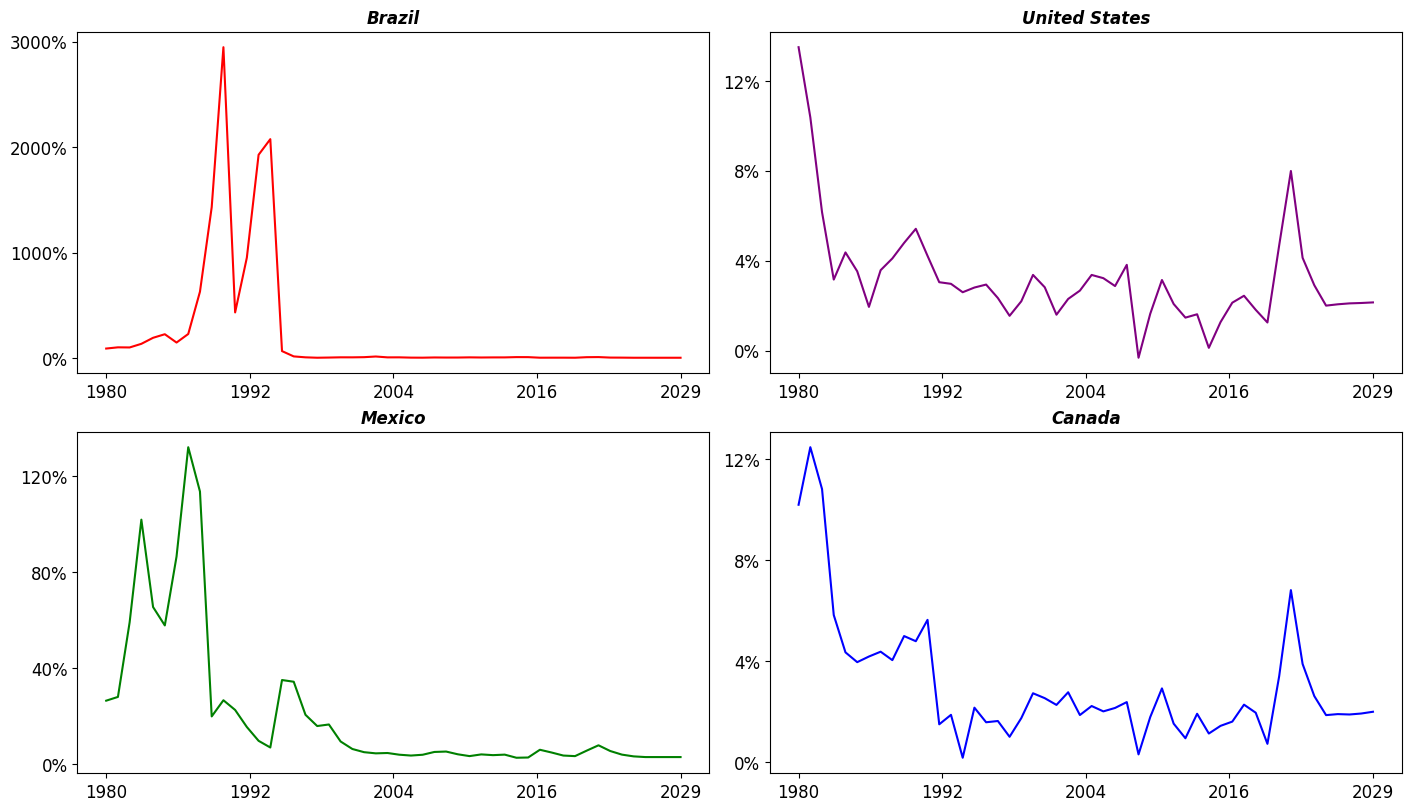

In [26]:
import psf_library as psf
import psf_library.plotting as psf_plot

colors = ['red', 'purple', 'green', 'blue']
fig, axes, dfs = psf_plot.plot_colored_lines(country_list, colors, prepped_dfs, 'Value', 'date', 2, 2, (14,8))

for ax, df, index in zip(axes, dfs, country_list):
    psf_plot.style_axes_date(ax, df, index, 'percent', 5, '%Y')